# Task 1

Create a function to rename DataFrame columns using dict_names.  
Summarize cleaned data and annotate observations (e.g., outliers, variability). 

**Inputs**: df, dict_names  
**Outputs**: renamed_df, summary notes 

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [123]:
# Create a function to rename the DataFrame columns
def rename_col (df, dict_names):
    return df.rename(columns=dict_names)

In [124]:
# Import the dataframe
df = pd.read_csv('breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [125]:
# Create the dictionary dict_names to later use it in the rename_col function
dict_names = dict(zip(df.columns, df.columns.str.replace(" ", "_")))

renamed_df = rename_col(df, dict_names)
renamed_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [126]:
# See if any of the columns has any NAN values
renamed_df.isna().sum()

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
diagnosis                  0
dtype: int64

In [127]:
# Create a function to remove outliers, using the IQR
def remove_outliers_iqr(df, cols=None, k=1.5):
    if cols is None:
        cols = df.select_dtypes(include="number").columns
    
    df_clean = df.copy()
    for c in cols:
        q1 = df_clean[c].quantile(0.25)
        q3 = df_clean[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        df_clean = df_clean[(df_clean[c] >= lower) & (df_clean[c] <= upper)]
    return df_clean

renamed_df = remove_outliers_iqr(renamed_df,cols=renamed_df.select_dtypes(include="number").columns.drop("diagnosis"))

In [128]:
renamed_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
16,14.680,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216,0
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1


In [129]:
# Use the pandas function describe to get a quick calculation of the descriptive statistics of each column of the clean dataframe
renamed_df.describe(include='all')

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,...,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,12.657874,17.855812,81.258051,501.577617,0.091094,0.073188,0.040040,0.025884,0.170335,0.060746,...,23.869928,91.151986,616.316968,0.124900,0.173859,0.159603,0.078858,0.271772,0.076544,0.920578
std,1.665272,3.830038,11.127620,130.468302,0.011321,0.024962,0.027029,0.015289,0.019242,0.004346,...,5.510194,13.373403,171.575985,0.017722,0.072546,0.098525,0.034769,0.038415,0.009361,0.270886
min,8.196000,9.710000,51.710000,201.900000,0.062510,0.019380,0.000000,0.000000,0.121500,0.051850,...,12.020000,57.260000,242.200000,0.081250,0.034320,0.000000,0.000000,0.178300,0.055210,0.000000
25%,11.570000,15.210000,73.880000,409.100000,0.083110,0.053520,0.020450,0.016150,0.157300,0.057230,...,19.800000,83.120000,510.500000,0.111800,0.123100,0.084340,0.056900,0.243900,0.069490,1.000000
50%,12.760000,17.460000,81.370000,496.600000,0.090300,0.070810,0.035460,0.023430,0.168700,0.060460,...,23.070000,89.710000,594.700000,0.124600,0.167900,0.145600,0.079110,0.268800,0.076280,1.000000
75%,13.750000,19.630000,88.440000,584.800000,0.098790,0.088340,0.053750,0.032510,0.184700,0.063440,...,27.820000,99.700000,718.900000,0.137400,0.217000,0.224100,0.100100,0.299800,0.082160,1.000000
max,16.840000,29.430000,108.400000,880.200000,0.123700,0.166100,0.147800,0.090290,0.223800,0.076330,...,40.540000,129.800000,1138.000000,0.173300,0.390400,0.434100,0.161400,0.384900,0.101700,1.000000


# Task 2

- Create scatterplots for two variables 
grouped by category.

In [130]:
plt.style.use('ggplot')

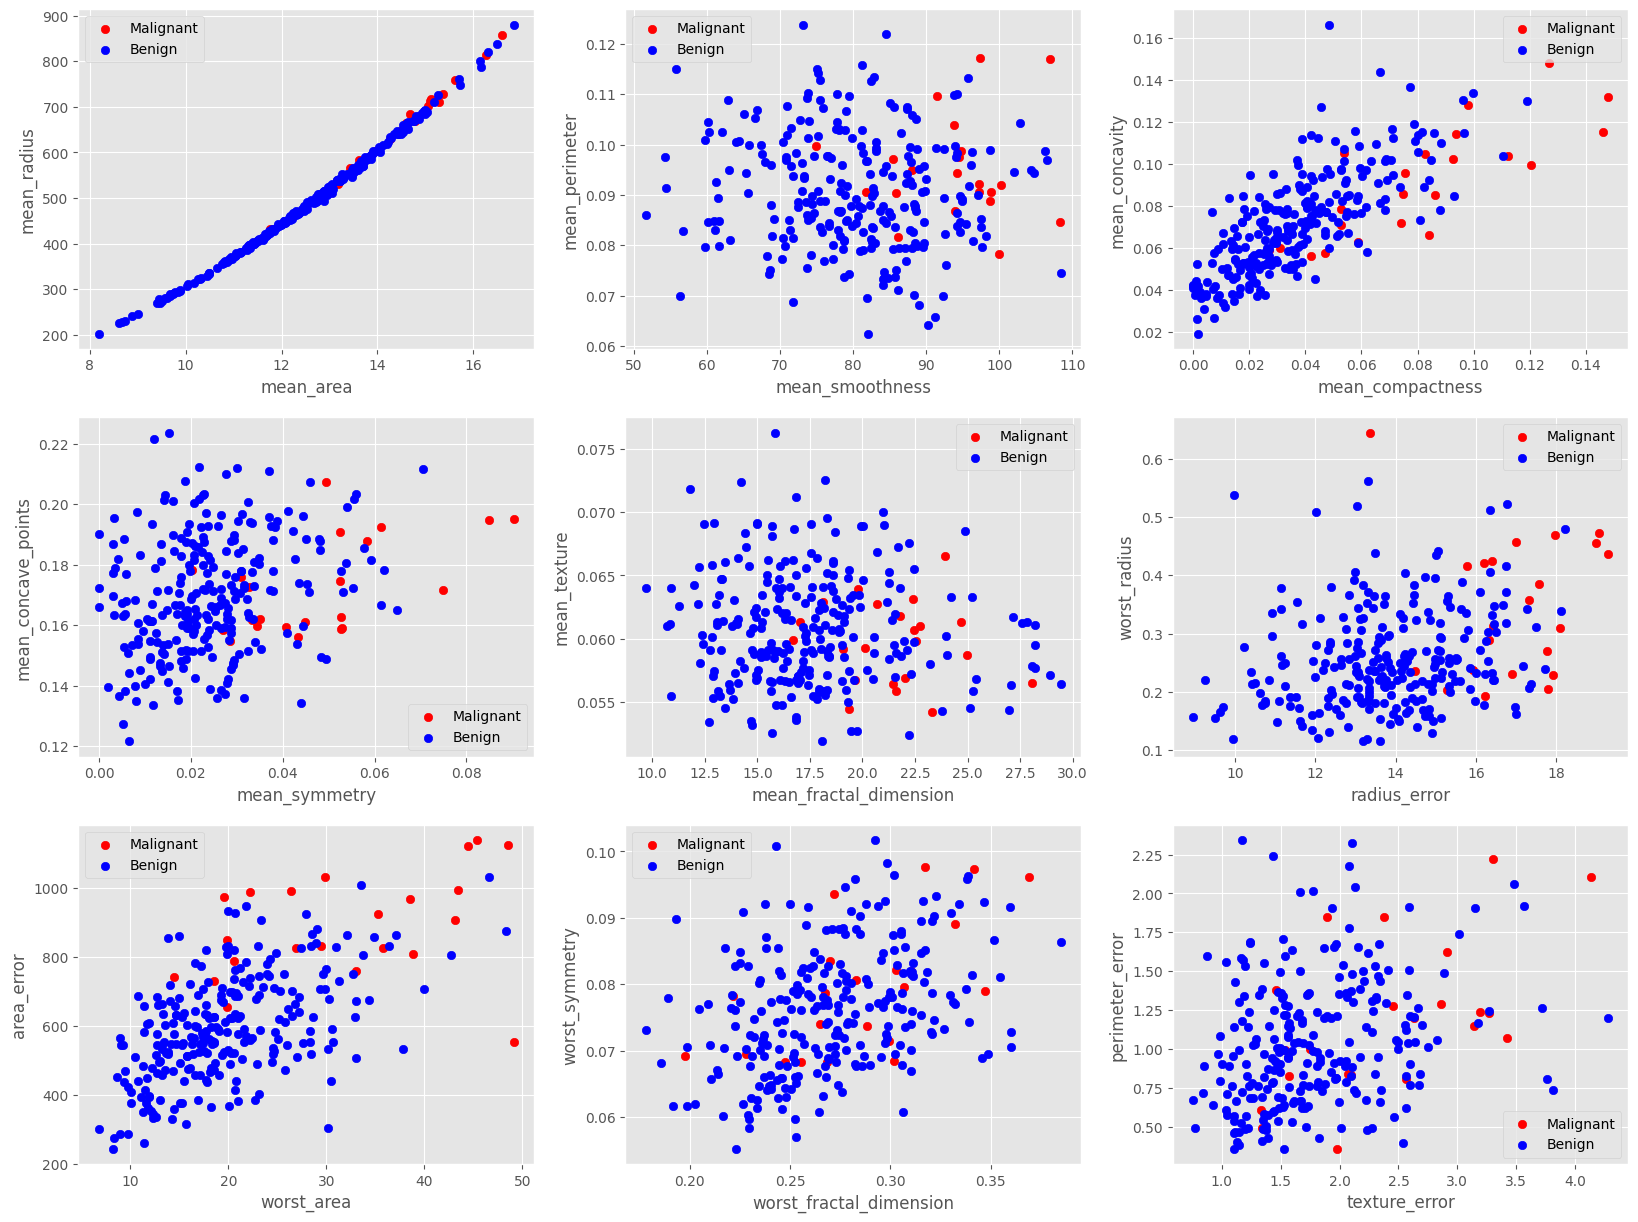

In [131]:
fig, axs = plt.subplots(3, 3,figsize=(20,15))
axs[0,0].scatter(renamed_df.mean_radius[renamed_df.diagnosis == 0], renamed_df.mean_area[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[0,0].scatter(renamed_df.mean_radius[renamed_df.diagnosis == 1], renamed_df.mean_area[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[0,0].set_ylabel('mean_radius')
axs[0,0].set_xlabel('mean_area')
axs[0,0].legend()

axs[0,1].scatter(renamed_df.mean_perimeter[renamed_df.diagnosis == 0], renamed_df.mean_smoothness[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[0,1].scatter(renamed_df.mean_perimeter[renamed_df.diagnosis == 1], renamed_df.mean_smoothness[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[0,1].set_ylabel('mean_perimeter')
axs[0,1].set_xlabel('mean_smoothness')
axs[0,1].legend()

axs[0,2].scatter(renamed_df.mean_concavity[renamed_df.diagnosis == 0], renamed_df.mean_compactness[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[0,2].scatter(renamed_df.mean_concavity[renamed_df.diagnosis == 1], renamed_df.mean_compactness[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[0,2].set_ylabel('mean_concavity')
axs[0,2].set_xlabel('mean_compactness')
axs[0,2].legend()


axs[1,0].scatter(renamed_df.mean_concave_points[renamed_df.diagnosis == 0], renamed_df.mean_symmetry[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[1,0].scatter(renamed_df.mean_concave_points[renamed_df.diagnosis == 1], renamed_df.mean_symmetry[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[1,0].set_ylabel('mean_concave_points')
axs[1,0].set_xlabel('mean_symmetry')
axs[1,0].legend()

axs[1,1].scatter(renamed_df.mean_texture[renamed_df.diagnosis == 0], renamed_df.mean_fractal_dimension[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[1,1].scatter(renamed_df.mean_texture[renamed_df.diagnosis == 1], renamed_df.mean_fractal_dimension[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[1,1].set_ylabel('mean_texture')
axs[1,1].set_xlabel('mean_fractal_dimension')
axs[1,1].legend()

axs[1,2].scatter(renamed_df.worst_radius[renamed_df.diagnosis == 0], renamed_df.radius_error[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[1,2].scatter(renamed_df.worst_radius[renamed_df.diagnosis == 1], renamed_df.radius_error[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[1,2].set_ylabel('worst_radius')
axs[1,2].set_xlabel('radius_error')
axs[1,2].legend()

axs[2,0].scatter(renamed_df.area_error[renamed_df.diagnosis == 0], renamed_df.worst_area[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[2,0].scatter(renamed_df.area_error[renamed_df.diagnosis == 1], renamed_df.worst_area[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[2,0].set_ylabel('area_error')
axs[2,0].set_xlabel('worst_area')
axs[2,0].legend()

axs[2,1].scatter(renamed_df.worst_symmetry[renamed_df.diagnosis == 0], renamed_df.worst_fractal_dimension[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[2,1].scatter(renamed_df.worst_symmetry[renamed_df.diagnosis == 1], renamed_df.worst_fractal_dimension[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[2,1].set_ylabel('worst_symmetry')
axs[2,1].set_xlabel('worst_fractal_dimension')
axs[2,1].legend()

axs[2,2].scatter(renamed_df.perimeter_error[renamed_df.diagnosis == 0], renamed_df.texture_error[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[2,2].scatter(renamed_df.perimeter_error[renamed_df.diagnosis == 1], renamed_df.texture_error[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[2,2].set_ylabel('perimeter_error')
axs[2,2].set_xlabel('texture_error')
axs[2,2].legend()

plt.show()

The features that seem more useful to predict diagnosis are: 
- *mean_radius*, 
- *mean_area*, 
- *mean_compactness*,
- *mean_smoothness*, 
- and *mean_symmetry*.

## Task 3

Normalize all variables in df using z-score or min-max scaling.  
I will use the renamed_df as input.

<span style="color:red">
I dont know if we should reset the indexes of the df (as we removed the outliers)
</span>


For the normalization we will use the z-score rather than the min-max normalization, the z-score handles the outliers better (although we eliminated them) and also searching information it seems that it works better with ML algorithms and is used as the standard. 

In [132]:
target = 'diagnosis'
def zscore(dataframe,target):
    num_cols = dataframe.select_dtypes('number').columns.drop(target)
    dataframe[num_cols] = (dataframe[num_cols] - dataframe[num_cols].mean())/dataframe[num_cols].std()
    return dataframe

df_norm = zscore(renamed_df,target)
df_norm.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
16,1.214292,0.593777,1.211575,1.402045,0.669198,-0.047589,1.254563,1.746712,-0.609852,-0.351024,...,1.272201,2.411354,3.040536,1.213207,0.182523,1.337695,2.359606,0.810301,0.599977,0
19,0.529719,-0.912736,0.557347,0.496077,0.591465,0.324579,0.984117,1.434070,0.944057,-0.709980,...,-0.836618,0.639180,0.553009,1.077782,0.047436,0.805851,1.436378,0.674937,-0.422342,1
20,0.253488,-0.560259,0.392892,0.141202,1.449179,2.155772,0.208663,0.341128,1.370212,1.694569,...,-0.613395,0.369241,0.082663,0.355517,1.430008,0.298367,-0.173375,1.213787,0.564725,1
21,-1.893909,-1.414036,-1.879832,-1.745080,0.998681,-0.331222,-0.387726,-0.335175,0.580265,1.910864,...,-1.489953,-1.945801,-1.756755,0.423229,-0.814087,-0.719952,-0.477091,-0.696918,0.126740,1
37,0.223463,0.147306,0.121495,0.170328,-0.111666,-1.423287,-0.533493,0.218818,-1.228298,-0.486783,...,-0.192358,-0.500395,-0.410413,-1.573723,-1.759832,-1.129390,-0.826250,-1.902173,-1.586739,1


Now we see correlation amog all variables:

In [133]:
X = df_norm.drop('diagnosis',axis=1)
corr = X.corr().abs()
corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
mean_radius,1.000000,0.098912,0.998029,0.995781,0.091068,0.298559,0.434178,0.554701,0.083728,0.521110,...,0.960010,0.077381,0.952612,0.947133,0.201197,0.311379,0.369832,0.523878,0.077950,0.211790
mean_texture,0.098912,1.000000,0.101699,0.102452,0.145048,0.052245,0.140728,0.044810,0.026563,0.104527,...,0.134784,0.915850,0.132723,0.141961,0.069246,0.105710,0.139326,0.087487,0.076551,0.034567
mean_perimeter,0.998029,0.101699,1.000000,0.993575,0.049692,0.354838,0.479151,0.593517,0.056259,0.482511,...,0.961419,0.082054,0.959464,0.948466,0.166101,0.359173,0.409636,0.560176,0.054522,0.171598
mean_area,0.995781,0.102452,0.993575,1.000000,0.104641,0.285362,0.440086,0.555041,0.087951,0.520802,...,0.959951,0.080790,0.952524,0.955705,0.204442,0.304844,0.373543,0.522100,0.084516,0.212394
mean_smoothness,0.091068,0.145048,0.049692,0.104641,1.000000,0.680442,0.404299,0.525072,0.394225,0.621608,...,0.047510,0.089249,0.014761,0.060887,0.780201,0.335255,0.253826,0.417630,0.273165,0.430924
mean_compactness,0.298559,0.052245,0.354838,0.285362,0.680442,1.000000,0.765334,0.765986,0.411677,0.478195,...,0.330803,0.067112,0.400661,0.313914,0.504948,0.803175,0.655360,0.708257,0.318485,0.550898
mean_concavity,0.434178,0.140728,0.479151,0.440086,0.404299,0.765334,1.000000,0.858145,0.296817,0.152259,...,0.474015,0.178034,0.531735,0.478111,0.366124,0.721295,0.871724,0.796971,0.218880,0.357772
mean_concave_points,0.554701,0.044810,0.593517,0.555041,0.525072,0.765986,0.858145,1.000000,0.274055,0.113530,...,0.580661,0.077680,0.620854,0.575155,0.389435,0.590491,0.638008,0.864133,0.162583,0.236100
mean_symmetry,0.083728,0.026563,0.056259,0.087951,0.394225,0.411677,0.296817,0.274055,1.000000,0.280544,...,0.063793,0.013651,0.023013,0.073930,0.274367,0.281615,0.227579,0.246753,0.642203,0.204007
mean_fractal_dimension,0.521110,0.104527,0.482511,0.520802,0.621608,0.478195,0.152259,0.113530,0.280544,1.000000,...,0.481102,0.091580,0.434121,0.477856,0.557314,0.285046,0.117009,0.076566,0.253999,0.741791


There are variables that have a lot of correlation between them (like mean_radius and mean_perimeter), this can lead to redundancy, giving collinearity problems. I will drop one of the 2 varaibles that are highly correlated between them.

In [134]:
thr = 0.9
shape = corr.shape
# keep only upper triangle (from the diagonal of corr = 1) of the corr matrix to avoid duplicates
upper = corr.where(np.triu(np.ones(shape), k=1).astype(bool))

# columns to drop that has a correlation > thr with a previous column
to_drop = [col for col in upper.columns if (upper[col] > thr).any()]

X_reduced = X.drop(columns=to_drop)
cleaned_df = pd.concat([X_reduced, df_norm['diagnosis']], axis=1)


In [140]:
#The dropped columns were:
X.columns.difference(X_reduced.columns)

Index(['area_error', 'mean_area', 'mean_perimeter', 'perimeter_error',
       'worst_area', 'worst_perimeter', 'worst_radius', 'worst_texture'],
      dtype='object')

In [136]:
cleaned_df.head()

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,...,concave_points_error,symmetry_error,fractal_dimension_error,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
16,1.214292,0.593777,0.669198,-0.047589,1.254563,1.746712,-0.609852,-0.351024,2.292931,0.438138,...,0.742123,-0.864853,-0.570982,1.213207,0.182523,1.337695,2.359606,0.810301,0.599977,0
19,0.529719,-0.912736,0.591465,0.324579,0.984117,1.434070,0.944057,-0.709980,0.065088,-0.642756,...,1.357070,0.380330,-0.352281,1.077782,0.047436,0.805851,1.436378,0.674937,-0.422342,1
20,0.253488,-0.560259,1.449179,2.155772,0.208663,0.341128,1.370212,1.694569,-0.865378,-0.740692,...,-0.631061,-0.279399,-0.225129,0.355517,1.430008,0.298367,-0.173375,1.213787,0.564725,1
21,-1.893909,-1.414036,0.998681,-0.331222,-0.387726,-0.335175,0.580265,1.910864,0.146380,-0.192104,...,1.673500,0.483003,0.327219,0.423229,-0.814087,-0.719952,-0.477091,-0.696918,0.126740,1
37,0.223463,0.147306,-0.111666,-1.423287,-0.533493,0.218818,-1.228298,-0.486783,-0.879659,3.076916,...,0.906308,1.889842,-0.884285,-1.573723,-1.759832,-1.129390,-0.826250,-1.902173,-1.586739,1
